# 1. 시나리오

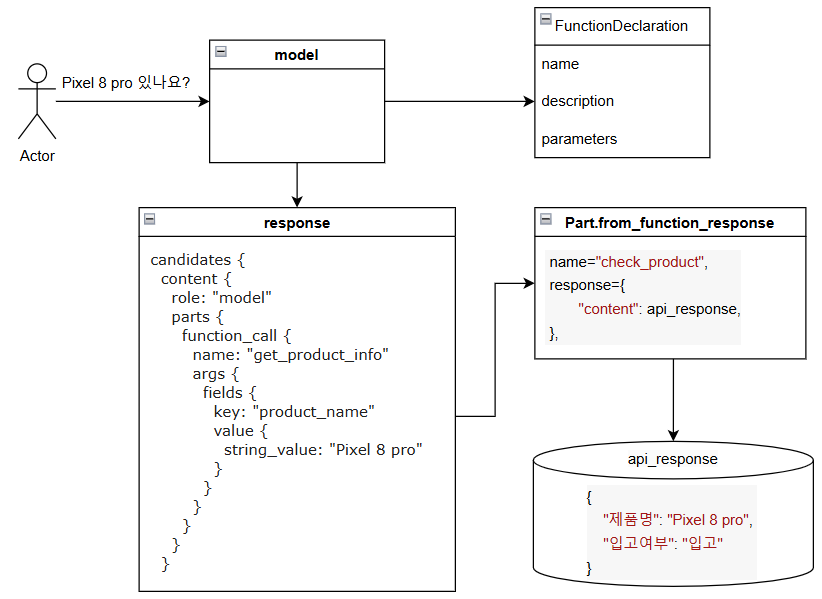

# 2. 환경설정

In [ ]:
!pip install --upgrade google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.73.0
    Uninstalling google-cloud-aiplatform-1.73.0:
      Successfully uninstalled google-cloud-aiplatform-1.73.0


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

# 3. 초기화

In [1]:
import vertexai

PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION = "us-east1"

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [2]:
from vertexai.generative_models import (
    GenerativeModel,
    FunctionDeclaration,
    Tool,
    GenerationConfig,
    Part,
)

# 4. 함수 생성 및 모델 연결

In [3]:
get_product_info = FunctionDeclaration(
    name="get_product_info",
    description="제품의 이름을 얻을 수 있다.",
    parameters={
        "type": "object",
        "properties":{
            "product_name": {"type": "string", "description": "제품 이름"}
        },
    },
)

In [4]:
multi_tools=Tool(
    function_declarations=[
        get_product_info,
    ]
)

In [5]:
model = GenerativeModel(
    "gemini-1.5-pro",
    generation_config=GenerationConfig(temperature=0),
    tools=[multi_tools]
)
chat = model.start_chat()

# 5. 결과 확인

In [6]:
prompt="""
겔럭시 s24 있나요?
"""

response = chat.send_message(prompt)
response.candidates[0].content.parts

[function_call {
   name: "get_product_info"
   args {
     fields {
       key: "product_name"
       value {
         string_value: "겔럭시 s24"
       }
     }
   }
 }]

In [7]:
api_response = {"제품명": "겔럭시 s24", "입고여부": "입고"}

In [8]:
response = chat.send_message(
    Part.from_function_response(
        name="check_product",
        response={
            "content": api_response,
        },
    ),
)
response.text

'네, 겔럭시 s24 입고되어 있습니다. \n'

In [10]:
print(chat.history)

[role: "user"
parts {
  text: "\n겔럭시 s24 있나요?\n"
}
, role: "model"
parts {
  function_call {
    name: "get_product_info"
    args {
      fields {
        key: "product_name"
        value {
          string_value: "겔럭시 s24"
        }
      }
    }
  }
}
, role: "user"
parts {
  function_response {
    name: "get_product"
    response {
      fields {
        key: "content"
        value {
          struct_value {
            fields {
              key: "제품명"
              value {
                string_value: "겔럭시 s24"
              }
            }
            fields {
              key: "입고여부"
              value {
                string_value: "입고"
              }
            }
          }
        }
      }
    }
  }
}
, role: "model"
parts {
  text: "네, 겔럭시 s24 입고되어 있습니다. \n"
}
]


In [ ]:
prompt="""
겔럭시 s24 있나요?
"""

response = chat.send_message(prompt)
response.candidates[0].content.parts

[function_call {
   name: "get_product_info"
   args {
     fields {
       key: "product_name"
       value {
         string_value: "겔럭시 s24"
       }
     }
   }
 }]

In [ ]:
api_response = {"제품명": "아이폰 16", "입고여부": "입고"}

response = chat.send_message(
    Part.from_function_response(
        name="get_product_info",
        response={
            "content": api_response,
        },
    ),
)
response.text

'죄송합니다. 겔럭시 s24는 현재 저희 매장에 없습니다. \n아이폰 16는 있습니다. 괜찮으시면 구매 도와드릴까요? \n'

In [ ]:
prompt="""
겔럭시 s24나 아이폰 16 있나요?
"""

response = chat.send_message(prompt)
response.candidates[0].content.parts[0]

function_call {
  name: "get_product_info"
  args {
    fields {
      key: "product_name"
      value {
        string_value: "겔럭시 s24"
      }
    }
  }
}

In [ ]:
api_response = [
    {"제품명": "pixel 8 pro", "입고여부": "입고"},
    {"제품명": "아이폰 16", "입고여부": "입고"},
    {"제품명": "겔럭시 s24", "입고여부": "입고"}
]

response = chat.send_message(
    Part.from_function_response(
        name="get_product_info",
        response={
            "content": api_response,
        },
    ),
)
response.text

'네, 겔럭시 s24 있습니다! 😊 혹시 구매를 원하시나요?  \n pixel 8 pro, 아이폰 16도 입고되었으니 참고해주세요! \n\n'